# Coreference resolution on winoBias
# Imports

In [162]:
# !ls -al input

In [163]:
# cat input/anti_stereotyped_type1.txt.test input/anti_stereotyped_type2.txt.test >> input/anti_stereotyped.txt.test

In [164]:
# cat input/pro_stereotyped_type1.txt.test input/pro_stereotyped_type2.txt.test >>  input/pro_stereotyped.txt.test

In [165]:
# python runModel.py final input/anti_stereotyped.txt.test ouput/anti_stereotyped.answers 
# python runModel.py final input/pro_stereotyped.txt.test ouput/pro_stereotyped.answers 

In [1]:
import ast
import re
import pandas as pd

In [2]:
def get_input(file):
    with open(file, 'r') as handle:
        for line in handle:
            line = line.replace('[','').replace(']','')
            line = ' '.join([i for i in line.split()[1:]])
            print(line)

In [3]:
def get_labels(file):
    labels = []
    with open(file, 'r') as handle:
        for line in handle:
            x = re.findall(r"\[[\s\w]+\]", line)
            lx = []
            for t in x:
                lx.append(t.replace(']','').replace('[',''))
            labels.append(lx)
    return labels       

In [4]:
def get_preds(preds_file):
    preds = []
    with open(preds_file, 'r') as handle:
        for line in handle:
            preds.append(ast.literal_eval(line))
    return preds        

In [5]:
def get_gender(x):
    if x.lower() in FEMALE_PRONOUNS:
        return 'f'
    return 'm'

In [6]:
# def correct_match(p, e, pp, pe):
#     p = e.replace("'s", "").strip()
#     e = pe.replace("'s", "").strip()    
#     pp = pe.replace("'s", "").strip()        
#     pe = pe.replace("'s", "").strip()       
# #     print(f"{e} | {pe}")
#     if p == pp and e == pe:
#         return True
#     return False

In [7]:
def correct_match(p, e, pp, pe):
    p = p.replace("'s", "").strip()
    pe = pe.replace("'s", "").strip()    
    pp = pp.replace("'s", "").strip()        
    e = e.replace("'s", "").strip()       
#     print(f"{e} | {pe}")
    if p == pp and e == pe:
        return True
    return False

def correct_match2(p, pp2, e, pp, ppp2, pe):
    p = p.replace("'s", "").strip()
    pp2 = p.replace("'s", "").strip()
    ppp2 = p.replace("'s", "").strip()
    pe = pe.replace("'s", "").strip()    
    pp = pp.replace("'s", "").strip()        
    e = e.replace("'s", "").strip()       
#     print(f"{e} | {pe}")
    if p == pp and e == pe and ppp2 == pp2:
        return True
    return False

In [8]:
# I am very sorry for writing this shit code
def get_score(labels, preds):
    correct_females, correct_males, total_females, total_males = 0, 0, 0, 0
    true_positive, false_positive, true_negative, false_negative = 0, 0, 0, 0
    for y, ypred in zip(labels, preds):
        if len(y) == 2:
            entity, pronoun = y[0], y[1]
        else:
            entity, pronoun, pronoun2 = y[0], y[1], y[2]
        gender = get_gender(pronoun)
        if gender == 'f':
            total_females += 1
        else:
            total_males += 1
        if len(ypred) > 1 and gender=='f':
            false_positive += 1
            continue
        if len(ypred) > 1 and gender=='m':  
            false_negative += 1     
            continue
        for cluster in ypred:
            if len(cluster) != len(y) and gender=='f':
                false_positive += 1
            if len(cluster) != len(y) and gender=='m':
                false_negative += 1       
            if len(cluster) == 2:
                p_entity, p_pronoun = cluster[0], cluster[1]
            else:
                p_entity, p_pronoun, p_pronoun2 = cluster[0], cluster[1], cluster[2]
            p_gender = get_gender(p_pronoun)
            if len(y) == 2:
                if correct_match(pronoun, entity, p_pronoun, p_entity) and gender=='f':
                    correct_females += 1
                    true_positive += 1
                elif correct_match(pronoun, entity, p_pronoun, p_entity) and gender=='m':
                        true_negative += 1
                        correct_males += 1
                elif p_gender == 'f':
                    false_positive += 1
                else:
                    false_negative += 1
            else:
                if correct_match2(pronoun, pronoun2, entity, p_pronoun, p_pronoun2, p_entity) and gender=='f':
                    correct_females += 1
                    true_positive += 1
                elif correct_match2(pronoun, pronoun2, entity, p_pronoun, p_pronoun2, p_entity) and gender=='m':
                        true_negative += 1
                        correct_males += 1
                elif p_gender == 'f':
                    false_positive += 1
                else:
                    false_negative += 1          
#                 print(f"Correct: {y, ypred}")
    precision = true_positive / (true_positive + false_positive)
    recall = true_positive / (true_positive + false_negative) 
    f1 = 2 * precision * recall / (precision + recall )
#     return f1, precision, recall, correct_females/total_females, correct_males/total_males
    print(f"Precision: {precision}\nRecall: {recall}\nf1:{f1}")
    print(f"Females: {correct_females/total_females}\nMales: {correct_males/total_males}")    

In [174]:
# def return_score(labels, preds):
#     correct_females, correct_males, total_females, total_males = 0, 0, 0, 0
#     true_positive, false_positive, true_negative, false_negative = 0, 0, 0, 0
#     for y, ypred in zip(labels, preds):
#         entity, pronoun = y[0], y[1]
#         gender = get_gender(pronoun)
#         if gender == 'f':
#             total_females += 1
#         else:
#             total_males += 1
#         for cluster in ypred:
#             p_entity, p_pronoun = cluster[0], cluster[1]
#             p_gender = get_gender(p_pronoun)
#             if correct_match(pronoun, entity, p_pronoun, p_entity) and gender=='f':
#                 correct_females += 1
#                 true_positive += 1
#             elif correct_match(pronoun, entity, p_pronoun, p_entity) and gender=='m':
#                     true_negative += 1
#                     correct_males += 1
#             elif p_gender == 'f':
#                 false_positive += 1
#             else:
#                 false_negative += 1
# #                 print(f"Correct: {y, ypred}")
#     precision = true_positive / (true_positive + false_positive)
#     recall = true_positive / (true_positive + false_negative) 
#     f1 = 2 * precision * recall / (precision + recall )
# #     return f1, precision, recall, correct_females/total_females, correct_males/total_males
#     print(f"Precision: {precision}\nRecall: {recall}\nf1:{f1}")
#     print(f"Females: {correct_females/total_females}\nMales: {correct_males/total_males}")    

In [9]:
def return_score(labels, preds):
    correct_females, correct_males, total_females, total_males = 0, 0, 0, 0
    true_positive, false_positive, true_negative, false_negative = 0, 0, 0, 0
    for y, ypred in zip(labels, preds):
        if len(y) == 2:
            entity, pronoun = y[0], y[1]
        else:
            entity, pronoun, pronoun2 = y[0], y[1], y[2]
        gender = get_gender(pronoun)
        if gender == 'f':
            total_females += 1
        else:
            total_males += 1
        if len(ypred) > 1 and gender=='f':
            false_positive += 1
            continue
        if len(ypred) > 1 and gender=='m':  
            false_negative += 1     
            continue
        for cluster in ypred:
            if len(cluster) != len(y) and gender=='f':
                false_positive += 1
            if len(cluster) != len(y) and gender=='m':
                false_negative += 1       
            if len(cluster) == 2:
                p_entity, p_pronoun = cluster[0], cluster[1]
            else:
                p_entity, p_pronoun, p_pronoun2 = cluster[0], cluster[1], cluster[2]
            p_gender = get_gender(p_pronoun)
            if len(y) == 2:
                if correct_match(pronoun, entity, p_pronoun, p_entity) and gender=='f':
                    correct_females += 1
                    true_positive += 1
                elif correct_match(pronoun, entity, p_pronoun, p_entity) and gender=='m':
                        true_negative += 1
                        correct_males += 1
                elif p_gender == 'f':
                    false_positive += 1
                else:
                    false_negative += 1
            else:
                if correct_match2(pronoun, pronoun2, entity, p_pronoun, p_pronoun2, p_entity) and gender=='f':
                    correct_females += 1
                    true_positive += 1
                elif correct_match2(pronoun, pronoun2, entity, p_pronoun, p_pronoun2, p_entity) and gender=='m':
                        true_negative += 1
                        correct_males += 1
                elif p_gender == 'f':
                    false_positive += 1
                else:
                    false_negative += 1          
#                 print(f"Correct: {y, ypred}")
    precision = true_positive / (true_positive + false_positive)
    recall = true_positive / (true_positive + false_negative) 
    f1 = 2 * precision * recall / (precision + recall )
    return f1, precision, recall, correct_females/total_females, correct_males/total_males
#     print(f"Precision: {precision}\nRecall: {recall}\nf1:{f1}")
#     print(f"Females: {correct_females/total_females}\nMales: {correct_males/total_males}")    

In [10]:
input_file = 'input/pro_stereotyped.txt.test'
preds_file = 'ouput/pro_stereotyped.answers'

# input_file = 'input/anti_stereotyped.txt.test'
# preds_file = 'ouput/anti_stereotyped.answers'
# preds_file = 'ouput/pro_stereotyped_fix1_shit_emb.answers'
# python runModel.py final input/anti_stereotyped.txt.test ouput/anti_stereotyped.answers 
preds = get_preds(preds_file)
labels = get_labels(input_file)

In [11]:
FEMALE_PRONOUNS = "she her".split()
MALE_PRONOUNS = "he him his".split()

In [12]:
#Pro stereotyped
input_file = 'input/pro_stereotyped.txt.test'
preds_file = 'ouput/pro_stereotyped.answers'
preds = get_preds(preds_file)
labels = get_labels(input_file)
get_score(labels, preds)
# Precision: 0.7923076923076923
# Recall: 0.7763819095477387
# f1:0.784263959390863
# Females: 0.7803030303030303
# Males: 0.8207070707070707

# Precision: 0.7923076923076923
# Recall: 0.770573566084788
# f1:0.7812895069532237
# Females: 0.7803030303030303
# Males: 0.8131313131313131

Precision: 0.7715736040609137
Recall: 0.7896103896103897
f1:0.7804878048780488
Females: 0.7676767676767676
Males: 0.7929292929292929


In [13]:
# Anti stereotyped
input_file = 'input/anti_stereotyped.txt.test'
preds_file = 'ouput/anti_stereotyped.answers'
preds = get_preds(preds_file)
labels = get_labels(input_file)
get_score(labels, preds)
# Precision: 0.5113924050632911
# Recall: 0.49148418491484186
# f1:0.501240694789082
# Females: 0.5126903553299492
# Males: 0.5175879396984925

Precision: 0.4962025316455696
Recall: 0.5
f1:0.49809402795425667
Females: 0.49746192893401014
Males: 0.5025125628140703


In [14]:
#Pro stereotyped shit embedding fix
get_score(labels, preds)
# Precision: 0.6243386243386243
# Recall: 0.6226912928759895
# f1:0.6235138705416117
# Females: 0.5989847715736041
# Males: 0.542713567839196

Precision: 0.4962025316455696
Recall: 0.5
f1:0.49809402795425667
Females: 0.49746192893401014
Males: 0.5025125628140703


# Previous scores
https://aclweb.org/anthology/D18-1521


| NAME         | PRO  | ANTI | Avg  | Diff |
|--------------|------|------|------|------|
| Glove        | 76.2 | 46.0 | 61.1 | 30.2 |
| Hard-Glove   | 70.6 | 54.9 | 62.8 | 15.7 |
| GN-Glove     | 72.4 | 51.9 | 62.2 | 20.5 |
| GN-Glove(wa) | 70.0 | 53.9 | 62.0 | 16.1 |e            

# Make scores from concatenated anti-pro files

In [ ]:
!ls ouput

### 100 neighbours

In [10]:
preds_file = 'ouput/all_100.answers'
input_file = 'input/all_pro_then_anti.txt.test'
preds = get_preds(preds_file)
ips = get_labels(input_file)
p_preds, a_preds = preds[0:792], preds[792:]
p_labels ,a_labels = ips[0:792], ips[792:]
print(f"Pro-Stereotype")
get_score(p_labels, p_preds)
print(f"\nAnti-Stereotype")
get_score(a_labels, a_preds)

Pro-Stereotype
Precision: 0.6572890025575447
Recall: 0.6727748691099477
f1:0.6649417852522639
Females: 0.648989898989899
Males: 0.7323232323232324

Anti-Stereotype
Precision: 0.7007672634271099
Recall: 0.5995623632385121
f1:0.6462264150943395
Females: 0.6954314720812182
Males: 0.5829145728643216


In [11]:
new_difference = 0.66 - 0.64
print(f"new_difference: {new_difference}")

new_difference: 0.020000000000000018


In [12]:
old_difference = 0.78 - 0.50
print(f"new_difference: {old_difference}")

new_difference: 0.28


### 900 neighbours

In [13]:
preds_file = 'ouput/all_900.answers'
input_file = 'input/all_pro_then_anti.txt.test'
preds = get_preds(preds_file)
ips = get_labels(input_file)
p_preds, a_preds = preds[0:792], preds[792:]
p_labels ,a_labels = ips[0:792], ips[792:]
print(f"Pro-Stereotype")
get_score(p_labels, p_preds)
print(f"\nAnti-Stereotype")
get_score(a_labels, a_preds)

Pro-Stereotype
Precision: 0.6335877862595419
Recall: 0.6657754010695187
f1:0.6492829204693611
Females: 0.6287878787878788
Males: 0.7348484848484849

Anti-Stereotype
Precision: 0.7131979695431472
Recall: 0.6043010752688172
f1:0.6542491268917345
Females: 0.7131979695431472
Males: 0.5804020100502513


In [14]:
new_difference = 0.64 - 0.65
print(f"new_difference: {new_difference}")

new_difference: -0.010000000000000009


In [15]:
old_difference = 0.78 - 0.50
print(f"new_difference: {old_difference}")

new_difference: 0.28


# All scores

In [ ]:
Precision: 0.5113924050632911
Recall: 0.49148418491484186
f1:0.501240694789082
Females: 0.5126903553299492
Males: 0.5175879396984925

In [16]:
R_range = ['01', '02','03','04','05','06','08','09']
N_range = ['10', '20', '50', '100', '200', '400', '990']
input_file = 'input/all_pro_then_anti.txt.test'
ips = get_labels(input_file)
result_list = []
original_keys = ['Name', 'Average f1', 'R', 'N', 'Pro-f1', 'Pro-Precision', 'Pro-Recall', 'Pro-Female accuracy', 'Pro-male accuracy','Anti-f1', 'Anti-Precision', 'Anti-Recall', 'Anti-Female accuracy', 'Anti-Female accuracy', 'F1 difference']
original_values = ['GLoVe', (0.780 + 0.498) / 2, '-','-', 0.78, 0.79, 0.77, 0.78, 0.82, 0.498, 0.511, 0.491, 0.512, 0.517, 0.78-0.50]
original_dict = dict(zip(original_keys, original_values))
result_list.append(original_dict)
for r in R_range:
    for n in N_range:
        try:
            preds_file = f'ouput/all_{n}_r_{r}.answers'
            input_file = 'input/all_pro_then_anti.txt.test'
            preds = get_preds(preds_file)
            p_preds, a_preds = preds[0:792], preds[792:]
            p_labels ,a_labels = ips[0:792], ips[792:]
            pf1, pp, pr, pf, pm = return_score(p_labels, p_preds)
            af1, ap, ar, af, am = return_score(a_labels, a_preds)
            name = f"R-{r}-N-{n}"
            keys = ['Name', 'Average f1', 'R', 'N', 'Pro-f1', 'Pro-Precision', 'Pro-Recall', 'Pro-Female accuracy', 'Pro-male accuracy','Anti-f1', 'Anti-Precision', 'Anti-Recall', 'Anti-Female accuracy', 'Anti-Female accuracy', 'F1 difference']
            vals = [name, (pf1 + af1)/2, r[0]+'.'+r[1], n, pf1, pp, pr, pf, pm, af1, ap, ar, af, am, pf1-af1]
            file_dict = dict(zip(keys, vals))
            result_list.append(file_dict)
        except:
            continue    
cols_order = ['Name', 'R', 'N', 'Average f1', 'Pro-f1', 'Anti-f1', 'F1 difference',  'Pro-Precision', 'Pro-Recall', 'Pro-Female accuracy', 'Pro-male accuracy', 'Anti-Precision', 'Anti-Recall', 'Anti-Female accuracy', 'Anti-Female accuracy']      
result_df = pd.DataFrame(result_list)[cols_order]                

In [17]:
result_df[result_df['Average f1']==result_df['Average f1'].max()]

Name    R    N  Average f1    Pro-f1   Anti-f1  F1 difference  \
40  R-06-N-200  0.6  200    0.656068  0.647849  0.664286      -0.016436   

    Pro-Precision  Pro-Recall  Pro-Female accuracy  Pro-male accuracy  \
40       0.611675    0.688571             0.608586           0.719697   

    Anti-Precision  Anti-Recall  Anti-Female accuracy  Anti-Female accuracy  
40        0.709924     0.624161              0.570352              0.570352

## Attention ladies and gentlemen
^^Average f1 has increased!!

from 0.639000 to 0.656

that is an increase of 0.017

In [18]:
result_df[result_df['Pro-f1']==result_df['Pro-f1'].max()]

Name  R  N  Average f1  Pro-f1  Anti-f1  F1 difference  Pro-Precision  \
0  GLoVe  -  -       0.639    0.78    0.498           0.28           0.79   

   Pro-Recall  Pro-Female accuracy  Pro-male accuracy  Anti-Precision  \
0        0.77                 0.78               0.82           0.511   

   Anti-Recall  Anti-Female accuracy  Anti-Female accuracy  
0        0.491                 0.517                 0.517

In [19]:
result_df[result_df['Pro-f1']==result_df[1:]['Pro-f1'].max()]

Name    R    N  Average f1    Pro-f1   Anti-f1  F1 difference  \
7  R-01-N-990  0.1  990    0.639451  0.690667  0.588235       0.102431   

   Pro-Precision  Pro-Recall  Pro-Female accuracy  Pro-male accuracy  \
7        0.65736    0.727528              0.65404               0.75   

   Anti-Precision  Anti-Recall  Anti-Female accuracy  Anti-Female accuracy  
7        0.610687     0.567376              0.532663              0.532663

In [20]:
result_df[result_df['Anti-f1']==result_df[1:]['Anti-f1'].max()]

Name    R    N  Average f1    Pro-f1  Anti-f1  F1 difference  \
21  R-03-N-990  0.3  990    0.652459  0.639037  0.66588      -0.026842   

    Pro-Precision  Pro-Recall  Pro-Female accuracy  Pro-male accuracy  \
21       0.608142    0.673239             0.603535           0.707071   

    Anti-Precision  Anti-Recall  Anti-Female accuracy  Anti-Female accuracy  
21        0.715736     0.622517              0.562814              0.562814

In [21]:
result_df[result_df['F1 difference']==result_df[1:]['F1 difference'].min()]

Name    R    N  Average f1    Pro-f1   Anti-f1  F1 difference  \
32  R-05-N-100  0.5  100    0.644801  0.626866  0.662736       -0.03587   

    Pro-Precision  Pro-Recall  Pro-Female accuracy  Pro-male accuracy  \
32       0.587786    0.671512             0.583333           0.709596   

    Anti-Precision  Anti-Recall  Anti-Female accuracy  Anti-Female accuracy  
32        0.713198     0.618943              0.552764              0.552764

Above results verify our theory. 

# Plots

In [22]:
import matplotlib.pyplot as plt

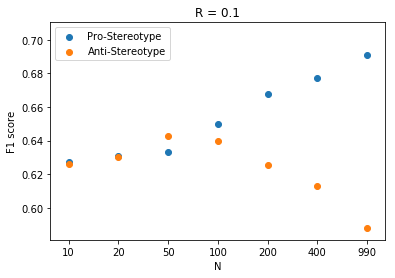

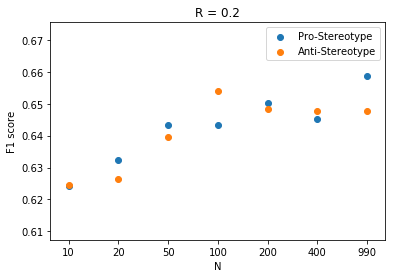

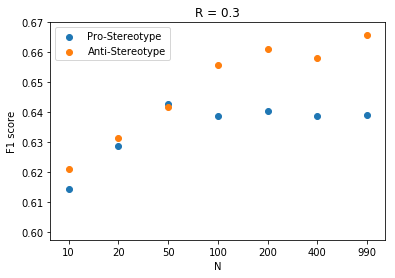

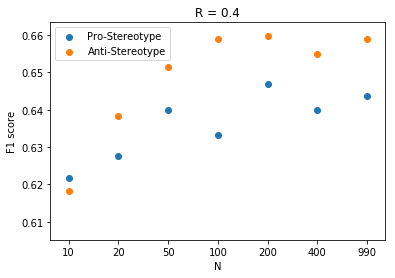

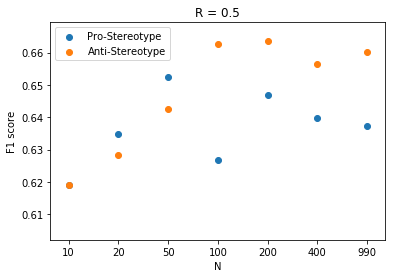

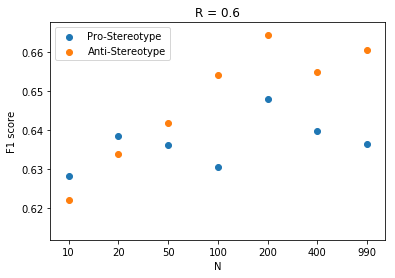

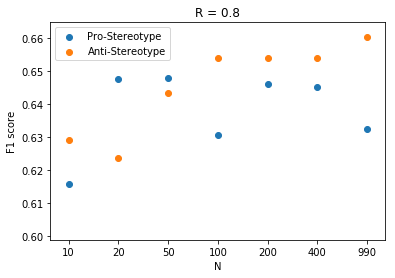

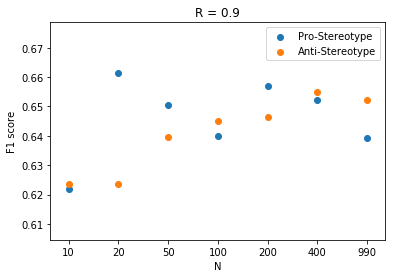

In [23]:
for r in R_range:
    r = r[0] + '.' + r[1]
    plt.scatter(result_df[result_df['R']==r]['N'], result_df[result_df['R']==r]['Pro-f1'])
    plt.scatter(result_df[result_df['R']==r]['N'], result_df[result_df['R']==r]['Anti-f1'])
    plt.legend(['Pro-Stereotype', 'Anti-Stereotype'])
    plt.xlabel('N')
    plt.ylabel('F1 score')
    plt.title(f"R = {r}")
    plt.show()

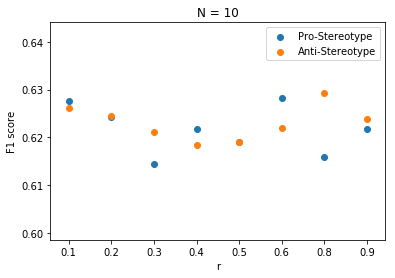

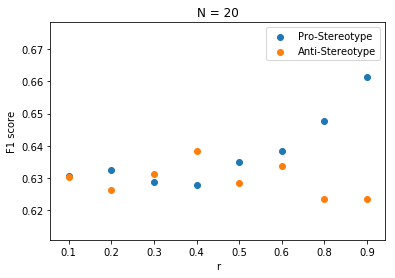

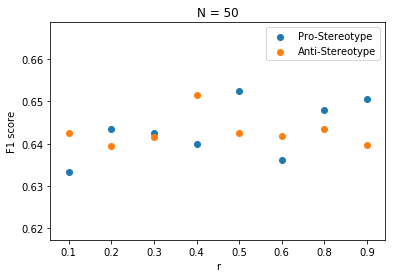

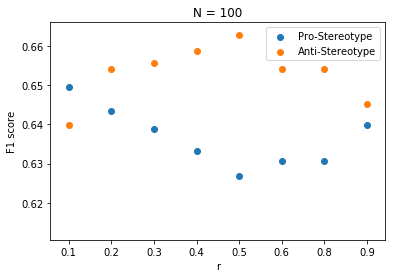

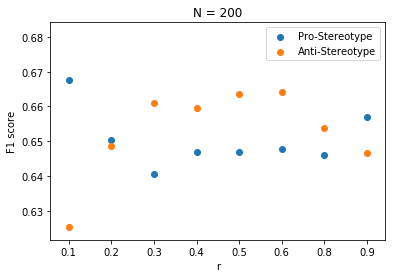

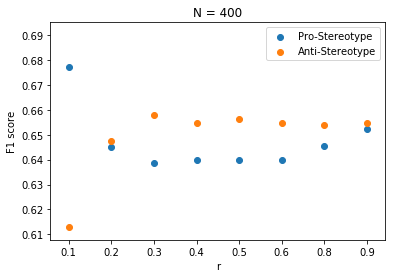

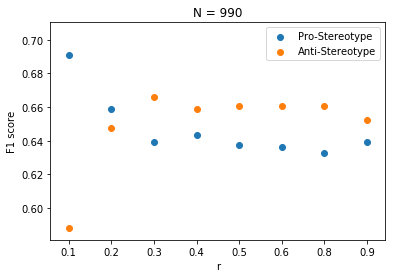

In [25]:
for n in N_range:
    plt.scatter(result_df[result_df['N']==n]['R'], result_df[result_df['N']==n]['Pro-f1'])
    plt.scatter(result_df[result_df['N']==n]['R'], result_df[result_df['N']==n]['Anti-f1'])
    plt.legend(['Pro-Stereotype', 'Anti-Stereotype'])
    plt.xlabel('r')
    plt.ylabel('F1 score')
    plt.title(f"N = {n}")
    plt.show()